In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Подготовка данных

In [44]:
df_r = pd.read_csv('../data/classification/responses_preprocessed.csv')
df_r.drop(columns='Unnamed: 0', inplace=True)
# Выделяем матрицу признаков и вектор лейблов из датасета
X = df_r.drop(['Gender_male', 'Gender_nan'], axis=1)
y = df_r['Gender_male']
X

Age  Height  Weight  Number of siblings  Music_2.0  Music_3.0  \
0     20.0   163.0    48.0                 1.0          0          0   
1     19.0   163.0    58.0                 2.0          0          0   
2     20.0   176.0    67.0                 2.0          0          0   
3     22.0   172.0    59.0                 1.0          0          0   
4     20.0   170.0    59.0                 1.0          0          0   
...    ...     ...     ...                 ...        ...        ...   
999   19.0   181.0    70.0                 1.0          0          0   
1000  16.0   153.0    62.0                 1.0          0          0   
1001  18.0   160.0    63.0                 2.0          0          0   
1002  22.0   181.0    72.0                 1.0          0          0   
1003  20.0   172.0    63.0                 1.0          0          0   

      Music_4.0  Music_5.0  Music_nan  Slow songs or fast songs_2.0  ...  \
0             0          1          0                             0  ...   
1             1          0          0                             0  ...   
2             0          1          0                             0  ...   
3             0          1          0                             0  ...   
4             0          1          0                             0  ...   
...         ...        ...        ...                           ...  ...   
999           0          1          0                             0  ...   
1000          0          1          0                             0  ...   
1001          0          1          0                             0  ...   
1002          0          1          0                             0  ...   
1003          1          0          0                             0  ...   

      Education_masters degree  Education_primary school  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
999                          0                         0   
1000                         0                         1   
1001                         0                         1   
1002                         0                         0   
1003                         0                         0   

      Education_secondary school  Education_nan  Only child_yes  \
0                              0              0               0   
1                              0              0               0   
2                              1              0               0   
3                              0              0               1   
4                              1              0               0   
...                          ...            ...             ...   
999                            1              0               0   
1000                           0              0               0   
1001                           0              0               0   
1002                           1              0               0   
1003                           1              0               0   

      Only child_nan  Village - town_village  Village - town_nan  \
0                  0                       1                   0   
1                  0                       0                   0   
2                  0                       0                   0   
3                  0                       0                   0   
4                  0                       1                   0   
...              ...                     ...                 ...   
999                0                       0                   0   
1000               0                       0                   0   
1001               0                       0                   0   
1002               0   

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Преобразуем числовые признаки путём их скалирования
sc.fit(X.iloc[:,:4])
X.iloc[:,:4] = pd.DataFrame(sc.transform(X.iloc[:,:4]))
X

Age    Height    Weight  Number of siblings  Music_2.0  Music_3.0  \
0    -0.146449 -1.061308 -1.345288           -0.294128          0          0   
1    -0.504197 -1.061308 -0.614248            0.703523          0          0   
2    -0.146449  0.249956  0.043688            0.703523          0          0   
3     0.569047 -0.153510 -0.541144           -0.294128          0          0   
4    -0.146449 -0.355243 -0.541144           -0.294128          0          0   
...        ...       ...       ...                 ...        ...        ...   
999  -0.504197  0.754288  0.263000           -0.294128          0          0   
1000 -1.577441 -2.069972 -0.321832           -0.294128          0          0   
1001 -0.861945 -1.363907 -0.248728            0.703523          0          0   
1002  0.569047  0.754288  0.409208           -0.294128          0          0   
1003 -0.146449 -0.153510 -0.248728           -0.294128          0          0   

      Music_4.0  Music_5.0  Music_nan  Slow songs or fast songs_2.0  ...  \
0             0          1          0                             0  ...   
1             1          0          0                             0  ...   
2             0          1          0                             0  ...   
3             0          1          0                             0  ...   
4             0          1          0                             0  ...   
...         ...        ...        ...                           ...  ...   
999           0          1          0                             0  ...   
1000          0          1          0                             0  ...   
1001          0          1          0                             0  ...   
1002          0          1          0                             0  ...   
1003          1          0          0                             0  ...   

      Education_masters degree  Education_primary school  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
999                          0                         0   
1000                         0                         1   
1001                         0                         1   
1002                         0                         0   
1003                         0                         0   

      Education_secondary school  Education_nan  Only child_yes  \
0                              0              0               0   
1                              0              0               0   
2                              1              0               0   
3                              0              0               1   
4                              1              0               0   
...                          ...            ...             ...   
999                            1              0               0   
1000                           0              0               0   
1001                           0              0               0   
1002                           1              0               0   
1003                           1              0               0   

      Only child_nan  Village - town_village  Village - town_nan  \
0                  0                       1                   0   
1                  0                       0                   0   
2                  0                       0                   0   
3                  0                       0                   0   
4                  0                       1                   0   
...              ...                     ...                 ...   
999                0                       0                   0   
1000               0                       0                   0   

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
# Разделяем данные на обучение и тест с сохранением соотношения классов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
print(Counter(y_train).values())
print(Counter(y_test).values())

dict_values([273, 399])
dict_values([197, 135])


## Построение классификационных моделей

In [47]:
# Множество предсказаний наших моделей
models_y_pred = {
    'knn' : [],
    'tree' : [],
    'nb' : [],
    'svm' : [],
    'lr' : [],
}

### Метод k-ближайших соседей (K-Nearest Neighbors)
Этот метод работает с помощью поиска кратчайшей дистанции между тестируемым объектом и ближайшими к нему классифицированным объектами из обучающего набора. Классифицируемый объект будет относится к тому классу, к которому принадлежит ближайший объект набора.

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [48]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
# Предсказывает неплохо, можно попробовать подобрать более оптимальные параметры
y_pred = classifier.predict(X_test)
models_y_pred['knn'] = y_pred.copy()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[182  15]
 [ 25 110]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       197
           1       0.88      0.81      0.85       135

    accuracy                           0.88       332
   macro avg       0.88      0.87      0.87       332
weighted avg       0.88      0.88      0.88       332



### Классификатор дерева решений (Decision Tree Classifier)

Этот классификатор разбивает данные на всё меньшие и меньшие подмножества на основе разных критериев, т. е. у каждого подмножества своя сортирующая категория. С каждым разделением количество объектов определённого критерия уменьшается.

Классификация подойдёт к концу, когда сеть дойдёт до подмножества только с одним объектом. Если объединить несколько подобных деревьев решений, то получится так называемый Случайный Лес (англ. Random Forest).

https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

In [49]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
# Предсказывает не сильно хорошо, нужно попробовать подобрать оптимальные параметры
y_pred = classifier.predict(X_test)
models_y_pred['tree'] = y_pred.copy()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  23]
 [ 19 116]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       197
           1       0.83      0.86      0.85       135

    accuracy                           0.87       332
   macro avg       0.87      0.87      0.87       332
weighted avg       0.87      0.87      0.87       332



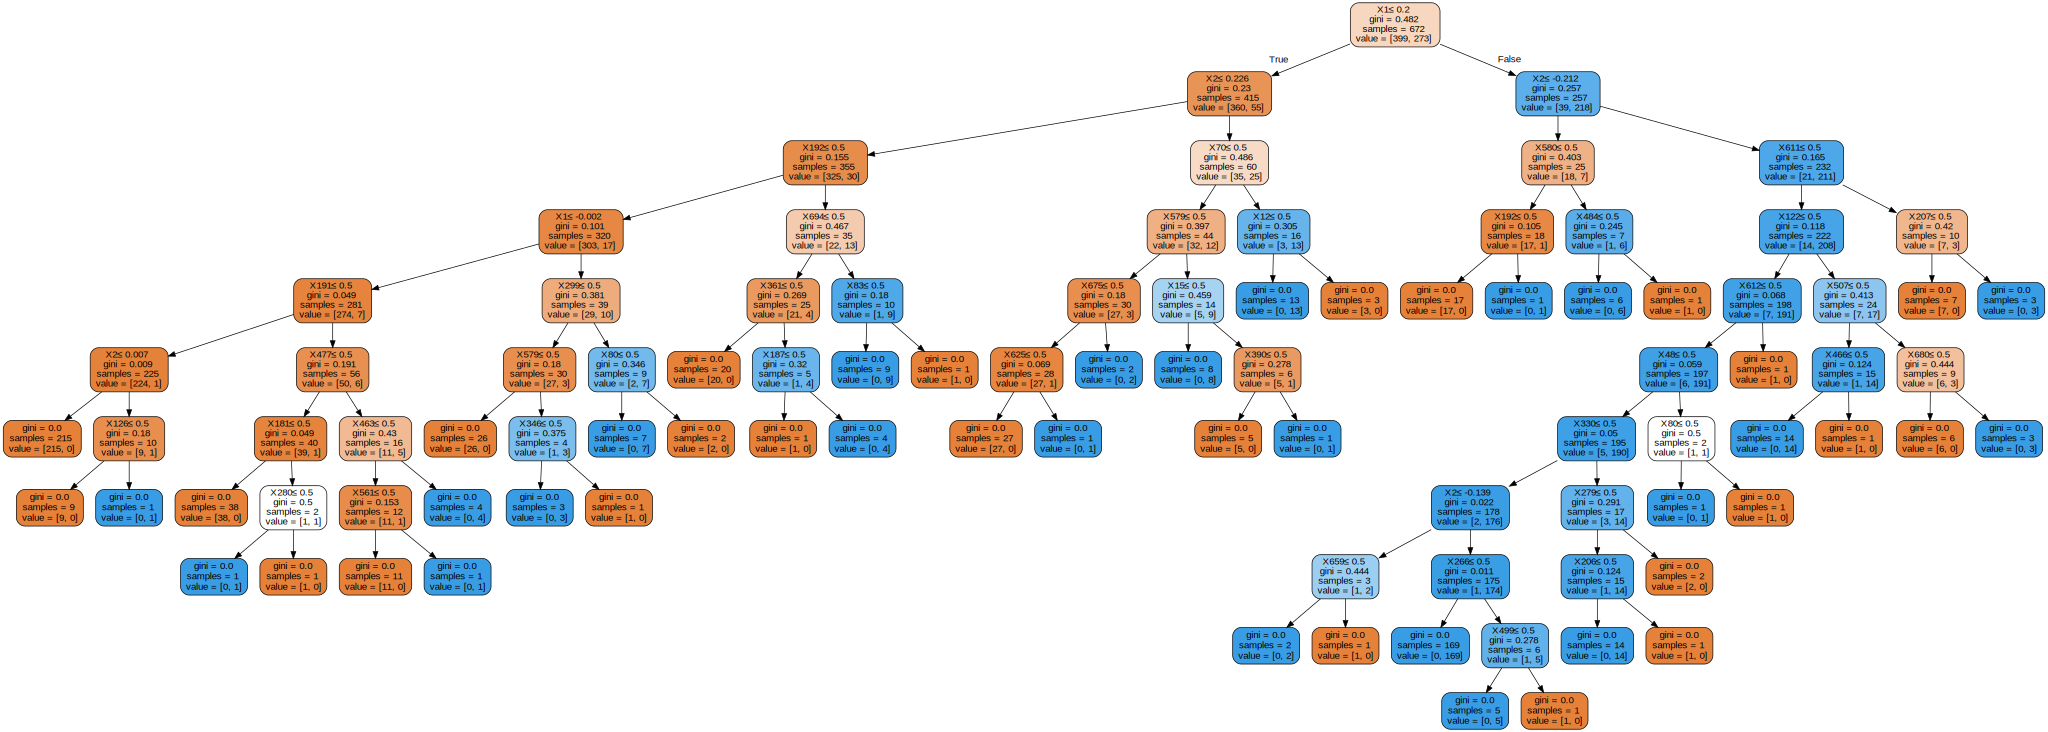

In [50]:
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('../plots/2_standard_tree')
graph = graphviz.Source(dot_data)
graph

### Наивный байесовский классификатор (Naive Bayes)

Такой классификатор вычисляет вероятность принадлежности объекта к какому-то классу. Эта вероятность вычисляется из шанса, что какое-то событие произойдёт, с опорой на уже на произошедшие события.

Каждый параметр классифицируемого объекта считается независимым от других параметров.

https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/

In [51]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Предсказывает плохо, нужно попробовать подобрать более оптимальные параметры
y_pred = classifier.predict(X_test)
models_y_pred['nb'] = y_pred.copy()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 29 168]
 [ 15 120]]
              precision    recall  f1-score   support

           0       0.66      0.15      0.24       197
           1       0.42      0.89      0.57       135

    accuracy                           0.45       332
   macro avg       0.54      0.52      0.40       332
weighted avg       0.56      0.45      0.37       332



### Метод опорных векторов (Support Vector Machines)

Работа метода опорных векторов заключается в рисовании линии между разными кластерами точек, которые нужно сгруппировать в классы. С одной стороны линии будут точки, принадлежащие одному классу, с другой стороны — к другому классу.

Классификатор будет пытаться увеличить расстояние между рисуемыми линиями и точками на разных сторонах, чтобы увеличить свою «уверенность» определения класса. Когда все точки построены, сторона, на которую они падают — это класс, которому эти точки принадлежат.

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

In [52]:
from sklearn import svm

classifier = svm.SVC()
classifier.fit(X_train, y_train)
# Предсказывает очень хорошо
y_pred = classifier.predict(X_test)
models_y_pred['svm'] = y_pred.copy()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[191   6]
 [ 16 119]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       197
           1       0.95      0.88      0.92       135

    accuracy                           0.93       332
   macro avg       0.94      0.93      0.93       332
weighted avg       0.93      0.93      0.93       332



### Логистическая регрессия (Logistic Regression)

Логистическая регрессия выводит прогнозы о точках в бинарном масштабе — нулевом или единичном. Если значение чего-либо равно либо больше 0.5, то объект классифицируется в большую сторону (к единице). Если значение меньше 0.5 — в меньшую (к нулю).

У каждого признака есть своя метка, равная только 0 или только 1. Логистическая регрессия является линейным классификатором и поэтому используется, когда в данных прослеживается какая-то линейная зависимость.

https://ru.wikipedia.org/wiki/Логистическая_регрессия

In [53]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
# Предсказывает очень хорошо
y_pred = classifier.predict(X_test)
models_y_pred['lr'] = y_pred.copy()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[185  12]
 [ 14 121]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       197
           1       0.91      0.90      0.90       135

    accuracy                           0.92       332
   macro avg       0.92      0.92      0.92       332
weighted avg       0.92      0.92      0.92       332



### Подбор гиперпараметров

Хуже всего себя проявили следующие модели:
наивный байесовский классификатор, классификатор дерева решений
и метод k-ближайших соседей.

Попробуем подобрать для них более оптимальные параметры, чем стандартные.

#### Наивный байесовский классификатор

In [54]:
from sklearn.model_selection import GridSearchCV

classifier = GaussianNB()
# Посмотрим на стандартные параметры
classifier.get_params(deep=True)

{'priors': None, 'var_smoothing': 1e-09}

In [55]:
%%time
n = 15
parameters = {
    'var_smoothing': np.concatenate((np.array([1 * (10**(-i)) for i in range(2, n)]), np.arange(0.1, 5, 0.1)))
}
estimator = GridSearchCV(classifier, parameters, cv=5, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

Наилучший оценщик
[[189   8]
 [  9 126]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       197
           1       0.94      0.93      0.94       135

    accuracy                           0.95       332
   macro avg       0.95      0.95      0.95       332
weighted avg       0.95      0.95      0.95       332

Наилучшие параметры
{'var_smoothing': 1.8000000000000003}
Wall time: 15.7 s


In [56]:
y_pred = models_y_pred['nb']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[ 29 168]
 [ 15 120]]
              precision    recall  f1-score   support

           0       0.66      0.15      0.24       197
           1       0.42      0.89      0.57       135

    accuracy                           0.45       332
   macro avg       0.54      0.52      0.40       332
weighted avg       0.56      0.45      0.37       332



0.9420342730790493

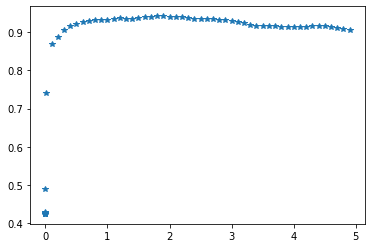

In [57]:
plt.plot(estimator.param_grid['var_smoothing'], estimator.cv_results_['mean_test_score'], '*')
estimator.cv_results_['mean_test_score'].max()

### Классификатор дерева решений

In [58]:
classifier = tree.DecisionTreeClassifier()
# Посмотрим на стандартные параметры
classifier.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [59]:
%%time
parameters = {
    'max_depth' : list(range(2, 25))
}
estimator = GridSearchCV(classifier, parameters, cv=5, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

Наилучший оценщик
[[190   7]
 [ 29 106]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       197
           1       0.94      0.79      0.85       135

    accuracy                           0.89       332
   macro avg       0.90      0.87      0.88       332
weighted avg       0.90      0.89      0.89       332

Наилучшие параметры
{'max_depth': 3}
Wall time: 3.76 s


In [60]:
y_pred = models_y_pred['knn']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[182  15]
 [ 25 110]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       197
           1       0.88      0.81      0.85       135

    accuracy                           0.88       332
   macro avg       0.88      0.87      0.87       332
weighted avg       0.88      0.88      0.88       332



0.8750027639579878

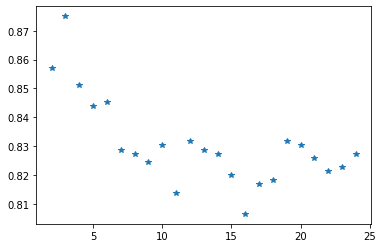

In [61]:
plt.plot(estimator.param_grid['max_depth'], estimator.cv_results_['mean_test_score'], '*')
estimator.cv_results_['mean_test_score'].max()

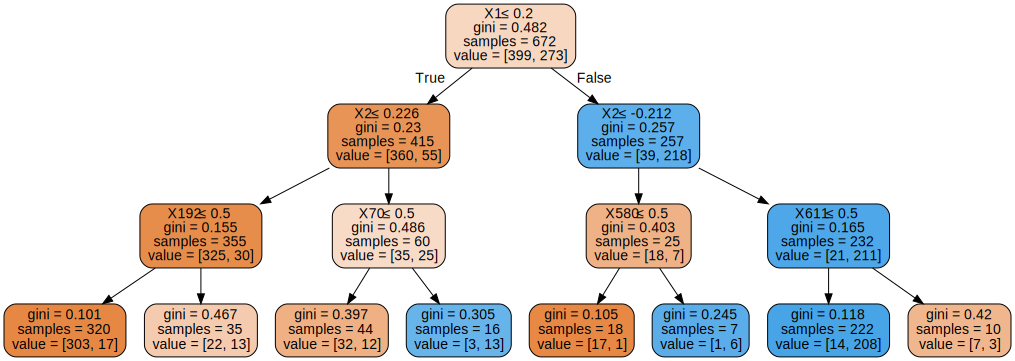

In [62]:
dot_data = tree.export_graphviz(estimator.best_estimator_, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('../plots/2_best_tree')
graph = graphviz.Source(dot_data)
graph

#### Метод k-ближайших соседей

In [63]:
classifier = KNeighborsClassifier()
# Посмотрим на стандартные параметры
classifier.get_params(deep=True)


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [64]:
%%time
parameters = {
    'n_neighbors' : list(range(2, 25))
}
estimator = GridSearchCV(classifier, parameters, cv=5, n_jobs=-1)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
print('Наилучший оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Наилучшие параметры')
print(estimator.best_params_)

Наилучший оценщик
[[188   9]
 [ 22 113]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       197
           1       0.93      0.84      0.88       135

    accuracy                           0.91       332
   macro avg       0.91      0.90      0.90       332
weighted avg       0.91      0.91      0.91       332

Наилучшие параметры
{'n_neighbors': 23}
Wall time: 2.5 s


In [65]:
y_pred = models_y_pred['knn']
print('Стандартный оценщик')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Стандартный оценщик
[[182  15]
 [ 25 110]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       197
           1       0.88      0.81      0.85       135

    accuracy                           0.88       332
   macro avg       0.88      0.87      0.87       332
weighted avg       0.88      0.88      0.88       332



0.9152128247650635

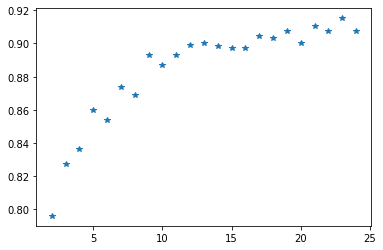

In [66]:
plt.plot(estimator.param_grid['n_neighbors'], estimator.cv_results_['mean_test_score'], '*')
estimator.cv_results_['mean_test_score'].max()
